In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configure plots for better visibility
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = [10, 6]


/var/folders/5l/gk6s2xx10qs0mkg4_9_vyp3h0000gn/T/ipykernel_62491/869262269.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


### Classification for Big Data

* Similar to a regression, the objective of classification is to come up with a function that best describes (approximates) an output $y$.
  * Unlike Regression, the objective is to model a categorical outcome, i.e., a label
  
* Estimate a function $f(x)$ so that $y = f(x)$

* The data is labeled as pairs of $\{(x_1, y_1), (x_2, y_2), .... (x_n, y_n)\}$, where 
  * $x$ is an input feature vector 
  * $y$ is the category we would like to predict
    * Also referred to as a class or label     

* A very simple, yet efficient approach to achieve this is through the k-nearest neighbors algorithm

### Nearest Neighbor Algorithm

* A simple approach to classification consists simply of assigning new observations to the same class as the instances to which they are similar
* Birds of a feather flock together

* Classify a new $x^*$ by finding the training example (x_i, y_i) closest to it.

The class $y^*$ for the new observation is $y_i$

* The number of instances we can compare to can be set upfront.
  * We can choose any $k$ number of instances to compare against
  * Decide based on a consensus if there is a disagreement in the neighbors' classes.
  * Hence the algorithm k-nearest instances (k-nearest neighbors)
 


### k-Nearest Neighbor Algorithm

* The $k$-nearest neighbors algorithm

* Distance metric:
  * Euclidean distance, i.e., the length of the segment (straight line) that separate two points in Euclidean space.
* How many neighbors to look at?
 $$k>=1$$ 
* Weighting function
  * Optional, but typically takes distance into consideration
* Consensus approach
 * Majority rule
 * weighted majority
 * etc.

### About the Euclidean distance

Using the pythagorean theorem, we have

<img src="https://www.dropbox.com/s/gpc2eg1umddhcsz/euclidean_distance.png?dl=1" alt="drawing" style="width:300px;"/>

$$
d^2 = (x2-x1)^2 + (y2-y1)^2  \Rightarrow  d = \sqrt{(x2-x1)^2 + (y2-y1)^2}
$$
where $d$ is the distnace between the two points (in blue).

in high-demensional space, the distance between two points $x_i = (x_{i,1}, x_{i,2}, x_{i,3}, .... x_{i,d})$ and $x_j= (x_{j,1}, x_{j,2}, x_{j,3}, .... x_{j,d})$ is:

$$
d = \sqrt{(x_{i,1} - x_{j,1})^2 + (x_{i,2} - x_{j,2})^2 + \dots + (x_{i,d} - x_{j,d})^2}
$$



###  Finding the k-Closest Instances

* Given a set $P$ of n points with $D$ features
  * The points are in $R^D$ space
* Given a query $x^*$, find the nearest neighbors of $x^*$ in $P$

* This needs to be carried out efficiently.
  * The naive solution would require inspecting all $n$ points to label each query $x^*$ 

![](https://www.dropbox.com/s/36yxn97bz11yird/nearest_p.png?dl=1)

###  Finding the k-Closest Instances - Algorithms
* Linear scan
  * O(N)
* Random projections  
  * Probabilistic behavior that may miss some neighbors if optimized for computational efficiency
* Tree-Based Algorithms
  * O(n log2 n) if an O(n log n) sort such as Heapsort or Mergesort is used to find the median at each level of the nascent tree;


### K-D Tree  Data Structure

* A space-partitioning data structure for organizing points in a k-dimensional space
* A binary tree in which every node is a k-dimensional point.
* Every internal node is a node that splits hyperplane into two parts (half-spaces)
  * Ex. split at some "value" for feature $z$ -> all points in the subtree with a smaller "z" value than the node will appear in the left subtree and all points with larger "z" value will be in the right subtree. 
![](https://www.dropbox.com/s/qv61pltvk6sibql/kd_tree.png?dl=1)


### K-D Tree  Data Structure

<img src="https://www.dropbox.com/s/tj0y0m4mebiyijv/3dtree.png?dl=1" style="width:350px;"> 


### Handling Points Close to a Boundary

* Start from the root and thread the nodes to find the region containing a query $x^*$

* Search all the regions that intersect the region containing $x^*$
  * In the unlikely event that we are unable to find K nearest neighbors, we can expand the search to other regions recursively
  
![](https://www.dropbox.com/s/1dn9oqmuxyzg2ky/kdd_search.png?dl=1)


# Apprixmate Nearest Neighbors

* The trivial algorithm to find neighbors requires processing all queries. How can we find the closest neighbor in less time?
* Often times, we can do with the approximate closest neighbors. One of the approach to work with large datasets
  * Perfectly fine for large datasets that are dense.
  Annoy (Axpproximate Nearest Neighbors Oh Yeah!)  
https://github.com/spotify/annoy

See image below.
* Log complexity in time to search 

The storage depends on the number of trees we will need to use (A  forest).
Each of the trees only hold labels. The value are still contained in a single location 

### Weighting function

### Weighting function

* We can weigh the contribution of a neighbor based on its distance from the query
  * Ideal for using k-nearest neighbor in regression

* We compute the distance as: 

$$
w^* = \text{exp}(-\frac{d(x^*, p)^2}{K_w}),
$$

where: 

* $d$ is the distance function (typically Euclidean distance)
* $k_w$ is the bandwidth of the function

![](https://www.dropbox.com/s/ph6tgqs35xwf6y3/distance_example.png?dl=1)


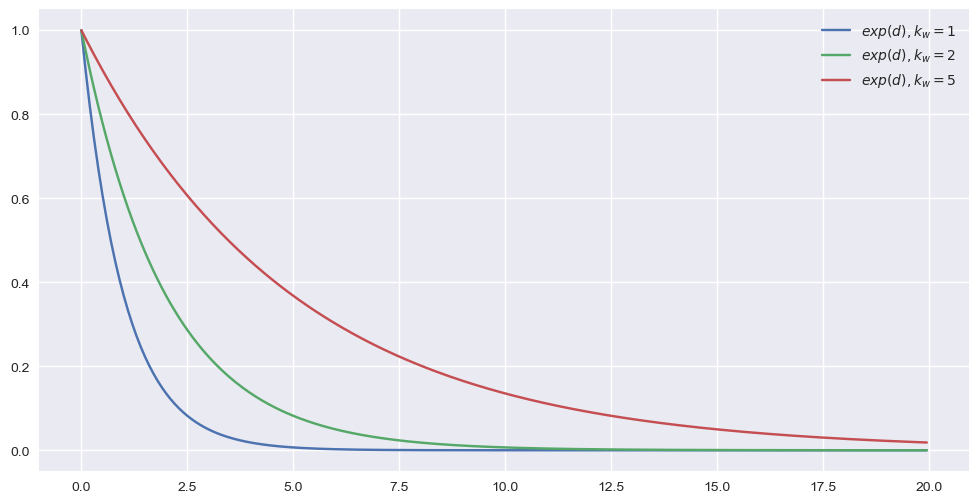

In [3]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
import numpy as np
k_w =1
x = np.arange(0,20,0.05)
plt.plot(x, np.exp(-x/k_w), label= f"$exp(d), k_w = {k_w}$")
k_w = 2
plt.plot(x, np.exp(-x/k_w), label= f"$exp(d), k_w = {k_w}$")

k_w = 5
plt.plot(x, np.exp(-x/k_w), label= f"$exp(d), k_w = {k_w}$")

plt.legend()

### Effect of the Bandwidth of the Contribution

![](https://www.dropbox.com/s/7u71mwg9aqz2tz5/bandwidth.png?dl=1)

In [ ]:
# K-Nearest Neighbors (KNN) for Regression

## What is KNN Regression?

* Most people know KNN for classification, but it can also be used for regression!
* Instead of voting for a class, KNN takes the average of the K nearest neighbors
* Think of it as "predicting a house price by averaging the prices of similar nearby houses"



## How Does KNN Regression Work?

1. For a new data point X:
   * Find the K nearest points in your training data
   * Take the average of their Y values
   * That average is your prediction

## Example:
* Predicting a house price:
  * Find 5 most similar houses (based on square footage, bedrooms, etc.)
  * Average their prices
  * Use that as your prediction

## Advantages of KNN Regression
* Simple to understand and implement
* No assumptions about data shape
* Works well with non-linear patterns
* No training phase - just stores the data

## Disadvantages of KNN Regression
* Computationally expensive with large datasets
* Need to store all training data
* Sensitive to irrelevant features
* Must choose K carefully (too small: overfitting, too large: oversmooting)
* Scale of features matters a lot

## Choosing K in Regression
* Small K: More local, potentially noisy predictions
* Large K: Smoother predictions, might miss local patterns
* Common to try odd numbers like 3, 5, 7

## When to Use KNN Regression?
* Large dataset 
* When relationship is complex/unknown
* When you have good feature selection
* When you need interpretable predictions

## Visualizing KNN Regression
```points to the plots in our notebook where we demonstrated different K values```
* Notice how different K values create smoother or more jagged predictions
* Smaller K follows the data more closely but might overfit
* Larger K creates smoother predictions but might miss important patterns

## Best Practices
* Scale your features
* Use cross-validation to choose K
* Consider feature importance/selection
* Watch out for the curse of dimensionality

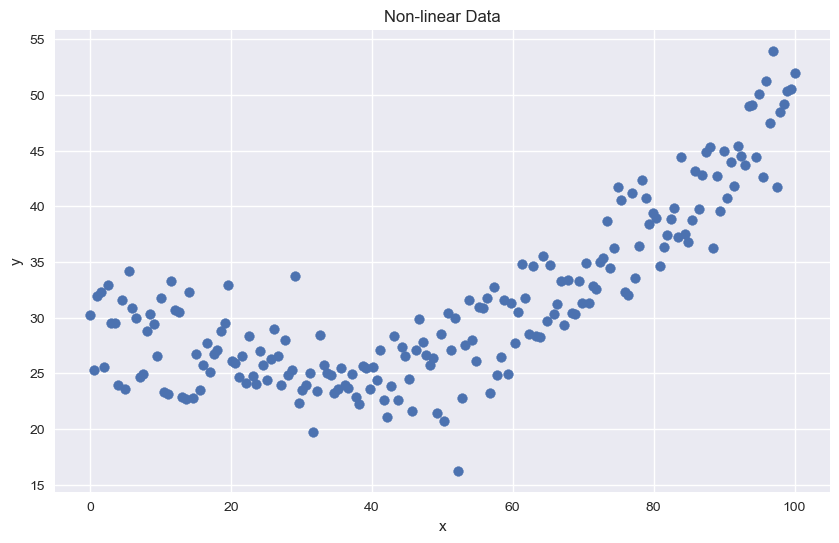

In [4]:
# Generate data for first example
x = np.linspace(0, 100, 200)
errors = np.random.normal(0, 3, 200)
y = 30 + (-0.3 * x) + (0.005 * x**2) + errors

# Plot first scatter plot
plt.figure()
plt.scatter(x, y)
plt.title('Non-linear Data')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


In [5]:
# Print positions and values example
pos = 52
print("The five positions before post 52 are:")
print(list(range(pos-5, pos+1)))
print("\nThe five x-values before post 52 are:")
print(x[pos-5:pos+1])
print("\nThe five y-value before post 52 are:")
print(y[pos-5:pos+1])

The five positions before post 52 are:
[47, 48, 49, 50, 51, 52]

The five x-values before post 52 are:
[23.61809045 24.12060302 24.62311558 25.12562814 25.6281407  26.13065327]

The five y-value before post 52 are:
[24.01937683 26.97075678 25.73997959 24.44610035 26.3187209  28.95023161]


In [6]:
# Get neighbors for visualization
x_neighbors = x[pos-5:pos+6]
y_neighbors = y[pos-5:pos+6]
print("\nx values 5 before and after:")
print(x_neighbors)



x values 5 before and after:
[23.61809045 24.12060302 24.62311558 25.12562814 25.6281407  26.13065327
 26.63316583 27.13567839 27.63819095 28.14070352 28.64321608]


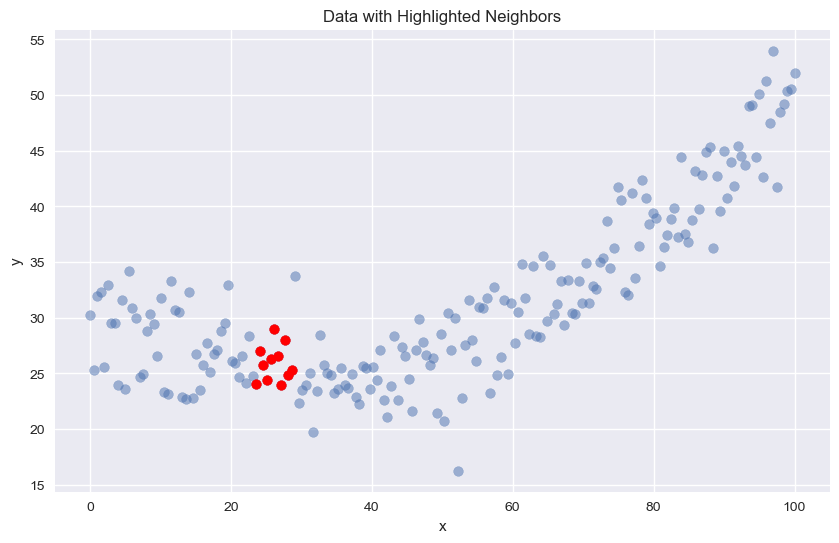

In [7]:
# Plot with highlighted neighbors
plt.figure()
plt.scatter(x, y, alpha=0.5)
plt.scatter(x_neighbors, y_neighbors, color='red')
plt.title('Data with Highlighted Neighbors')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

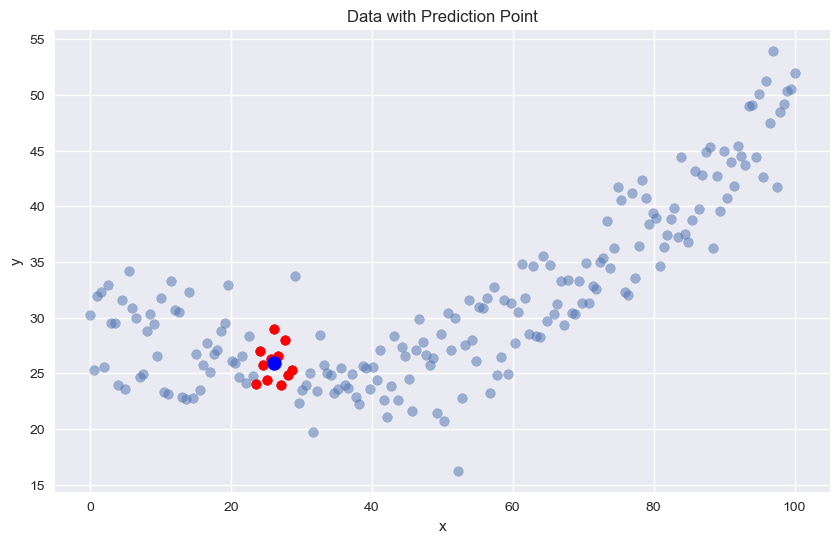

In [9]:
x_pos = x[pos]
y_pred_pos = np.mean(y[pos-5:pos+6])

plt.figure()
plt.scatter(x, y, alpha=0.5)
plt.scatter(x_neighbors, y_neighbors, color='red')
plt.scatter(x_pos, y_pred_pos, color='blue', s=100)
plt.title('Data with Prediction Point')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


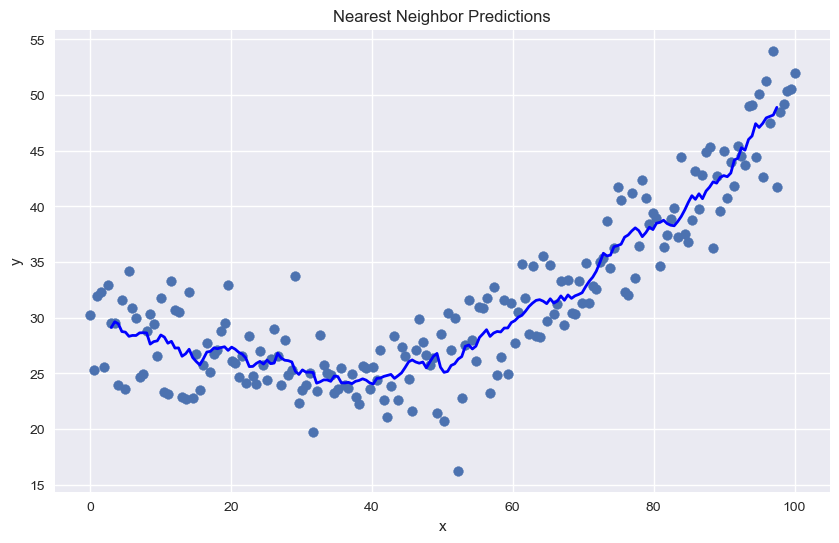

In [11]:
def compute_nn_avg(pos, step=5):
    return np.mean(y[pos-step:pos+step+1])

# Calculate predictions for all points
x_positions = range(6, 195)
pred_values = [compute_nn_avg(pos) for pos in x_positions]

plt.figure()
plt.scatter(x, y)
plt.plot(x[6:195], pred_values, color='blue', linewidth=2)
plt.title('Nearest Neighbor Predictions')
plt.xlabel('x')
plt.ylabel('y')
plt.show()



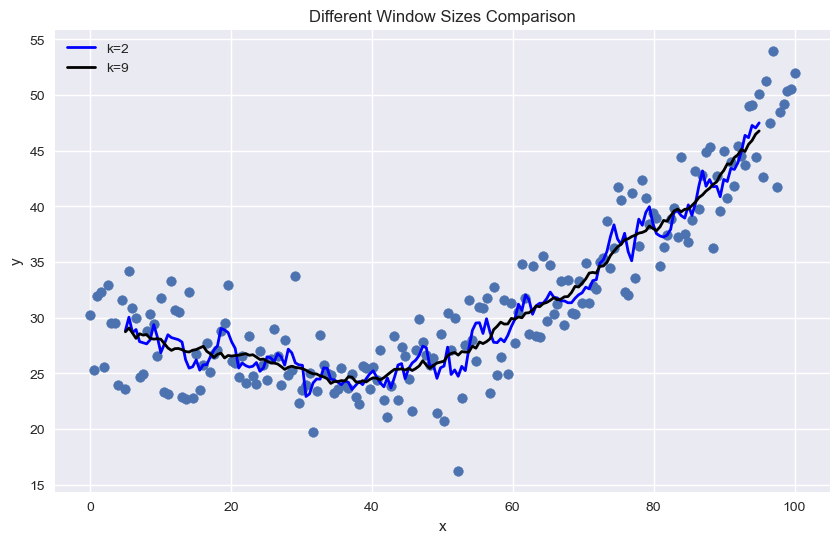

In [12]:
# Compare different window sizes
x_positions = range(10, 190)
pred_values_k_2 = [compute_nn_avg(pos, 2) for pos in x_positions]
pred_values_k_9 = [compute_nn_avg(pos, 9) for pos in x_positions]

plt.figure()
plt.scatter(x, y)
plt.plot(x[10:190], pred_values_k_2, color='blue', linewidth=2, label='k=2')
plt.plot(x[10:190], pred_values_k_9, color='black', linewidth=2, label='k=9')
plt.title('Different Window Sizes Comparison')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


### KNN Advantages

* Easy to implement and understand
  * Implemented on most platforms, 
* Promotes interpretability since we can use neighbors to better understand the decision
* No optimization or training required
  * Can do some training to learn the best $k$
* Can lead to very good classification accuracy, often outperforming much more complex models
  * Test below not representative of very large data...
![](https://www.dropbox.com/s/djkyl5dfkexrhx2/classification_comparison.png?dl=1)

### KNN Disadvantages

* Fails to work well with very high-dimensional data.
  * The curse of dimensionality makes it such that the closest neighbor may not be similar enough for classification purposes

* Even when implemented with an efficient data structure, the algorithm must pass through a subset of the data

  * Can be computationally prohibitive for extremely large data